In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/multivariate

In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import string

# Read the dataframe
data = pd.read_csv("train_data.csv")
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [8]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

data_filtered = data.dropna(subset=['LastWorkingDate'])

# Calculate the target variable (difference between LastWorkingDate and Dateofjoining)
data_filtered['EmploymentLength'] = data_filtered['LastWorkingDate'] - data_filtered['Dateofjoining']


<ipython-input-8-8f14a3f5275d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['EmploymentLength'] = data_filtered['LastWorkingDate'] - data_filtered['Dateofjoining']


In [9]:
data_filtered['EmploymentLength'] = data_filtered['EmploymentLength'].dt.days.astype(str).str.split(' ').str[0].astype(int)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 2 to 19096
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                1616 non-null   object        
 1   Emp_ID                1616 non-null   int64         
 2   Age                   1616 non-null   int64         
 3   Gender                1616 non-null   object        
 4   City                  1616 non-null   object        
 5   Education_Level       1616 non-null   object        
 6   Salary                1616 non-null   int64         
 7   Dateofjoining         1616 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   1616 non-null   int64         
 10  Designation           1616 non-null   int64         
 11  Total Business Value  1616 non-null   int64         
 12  Quarterly Rating      1616 non-null   int64         
 13  EmploymentLength 

<ipython-input-9-c0b374fda813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['EmploymentLength'] = data_filtered['EmploymentLength'].dt.days.astype(str).str.split(' ').str[0].astype(int)


In [10]:
data_filtered['Gender_Female'] = pd.get_dummies(data_filtered['Gender'], prefix='Gender')['Gender_Female']
data_filtered.drop('Gender', axis=1)

<ipython-input-10-bc6d86384120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Gender_Female'] = pd.get_dummies(data_filtered['Gender'], prefix='Gender')['Gender_Female']


,MMM-YY,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,EmploymentLength,Gender_Female
2,2016-03-01,1,28,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,78,0
9,2017-04-01,4,43,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,141,0
12,2016-03-01,5,29,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,58,0
20,2017-11-01,8,34,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1,57,0
27,2016-12-01,12,35,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1,175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779,28,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1,19,0
19054,2016-08-01,2782,26,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1,92,0
19081,2017-10-01,2785,34,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,61,1
19090,2016-09-01,2786,45,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,419,0


In [11]:
data_filtered['Education_Level']

2          Master
9          Master
12        College
20        College
27         Master
           ...   
19039     College
19054    Bachelor
19081     College
19090     College
19096      Master
Name: Education_Level, Length: 1616, dtype: object

In [12]:
# encoding
data_filtered['Education_Level'] = data_filtered['Education_Level'].astype('category').cat.codes
data_filtered['Education_Level']


<ipython-input-12-120f26901d8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Education_Level'] = data_filtered['Education_Level'].astype('category').cat.codes


2        2
9        2
12       1
20       1
27       2
        ..
19039    1
19054    0
19081    1
19090    1
19096    2
Name: Education_Level, Length: 1616, dtype: int8

In [13]:
data_filtered.Education_Level.value_counts()

2    547
1    542
0    527
Name: Education_Level, dtype: int64

In [14]:
data_filtered.drop('MMM-YY', axis=1, inplace=True)
data_filtered.drop('Emp_ID', axis=1, inplace=True)


<ipython-input-14-e15bdd15e39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.drop('MMM-YY', axis=1, inplace=True)
<ipython-input-14-e15bdd15e39f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.drop('Emp_ID', axis=1, inplace=True)


In [15]:
data_filtered.head()

,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,EmploymentLength,Gender_Female
2,28,Male,C23,2,57387,2015-12-24,2016-03-11,1,1,0,2,78,0
9,43,Male,C13,2,65603,2016-12-07,2017-04-27,2,2,0,1,141,0
12,29,Male,C9,1,46368,2016-01-09,2016-03-07,1,1,0,1,58,0
20,34,Male,C2,1,70656,2017-09-19,2017-11-15,3,3,0,1,57,0
27,35,Male,C23,2,28116,2016-06-29,2016-12-21,1,1,0,1,175,0


In [16]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 2 to 19096
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   1616 non-null   int64         
 1   Gender                1616 non-null   object        
 2   City                  1616 non-null   object        
 3   Education_Level       1616 non-null   int8          
 4   Salary                1616 non-null   int64         
 5   Dateofjoining         1616 non-null   datetime64[ns]
 6   LastWorkingDate       1616 non-null   datetime64[ns]
 7   Joining Designation   1616 non-null   int64         
 8   Designation           1616 non-null   int64         
 9   Total Business Value  1616 non-null   int64         
 10  Quarterly Rating      1616 non-null   int64         
 11  EmploymentLength      1616 non-null   int64         
 12  Gender_Female         1616 non-null   uint8         
dtypes: datetime64[ns]

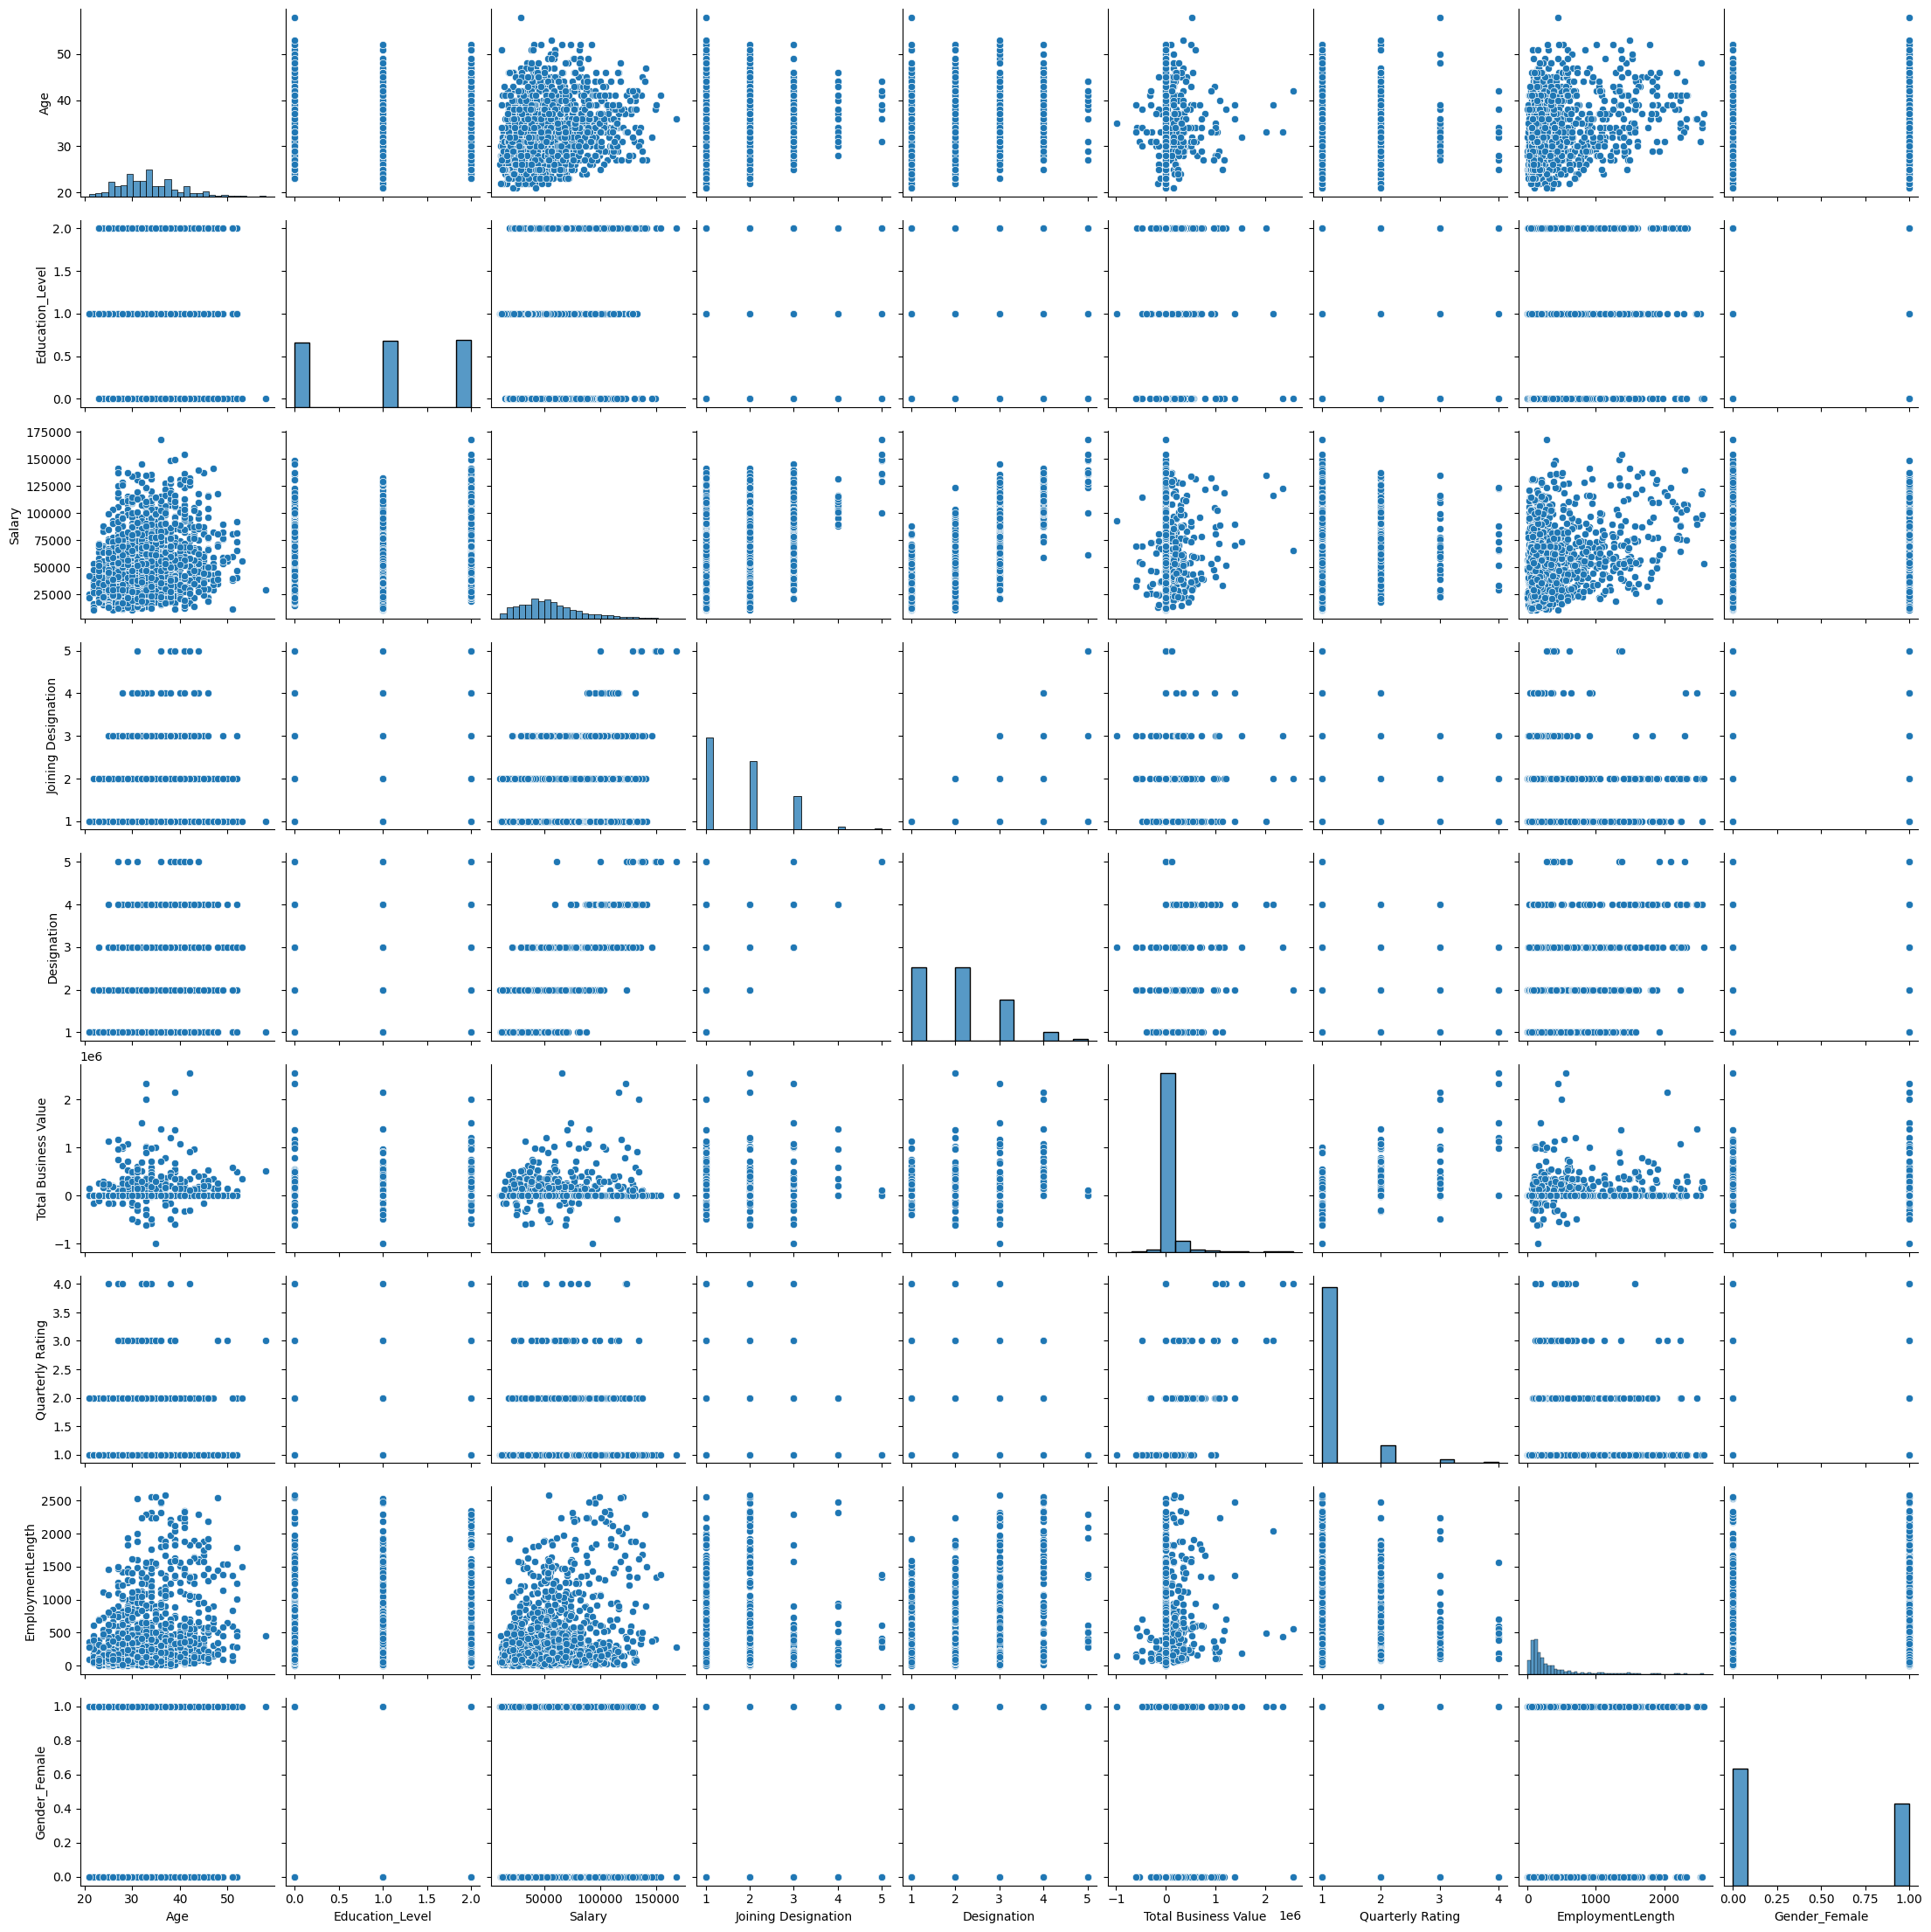

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_variables = data_filtered.select_dtypes(exclude='object')

# Create the scatterplot matrix
sns.pairplot(numeric_variables)
plt.show()

<ipython-input-18-52651ba99270>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


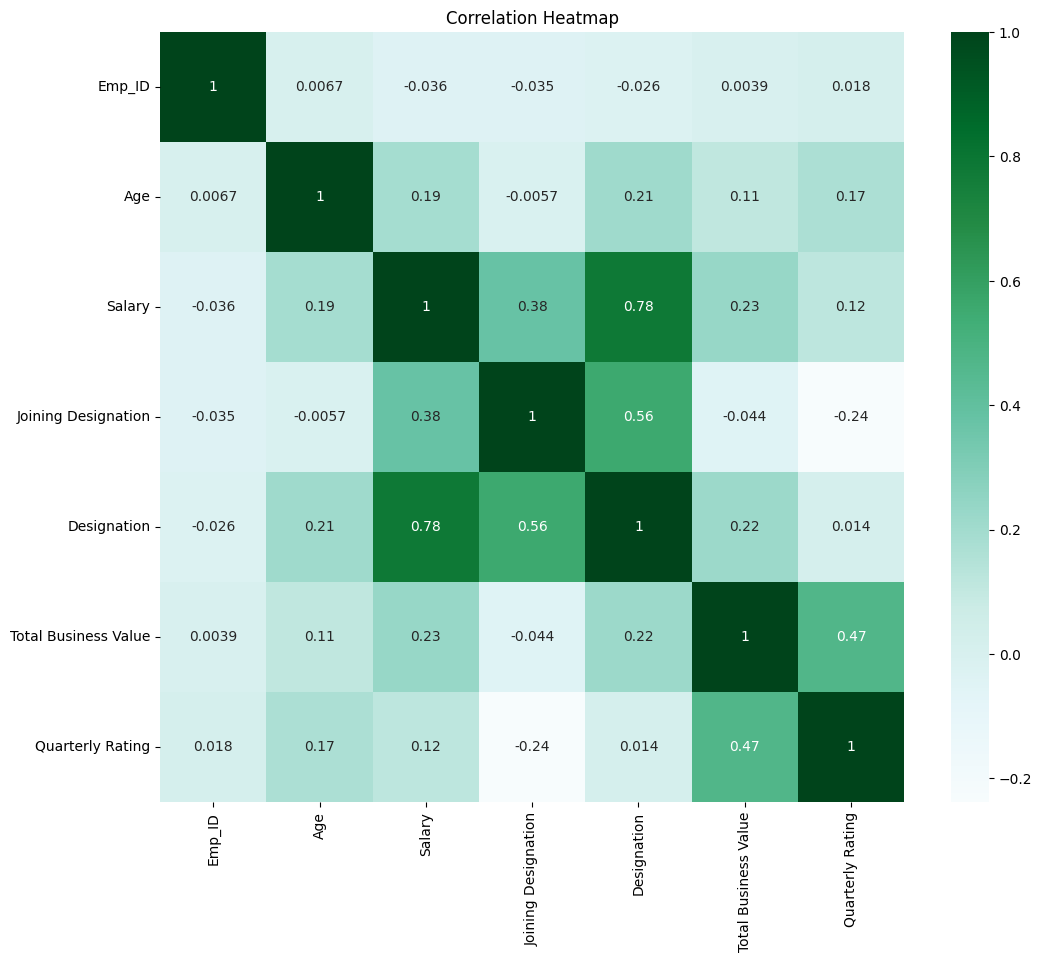

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')

# Add plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In the case of right-skewed variables like "**Salary**," it might be necessary to apply transformations, such as logarithmic or power transformations, to achieve a more normal distribution before conducting the regression analysis. This transformation can help improve the linearity and normality assumptions of the model.


<ipython-input-19-288d694ecd76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Salary'] = np.log(data_filtered['Salary'])


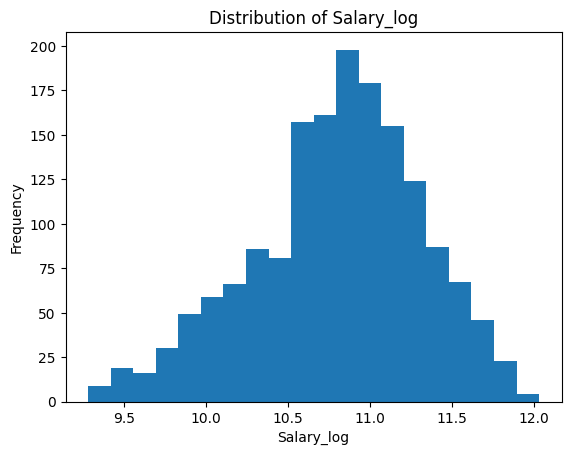

In [19]:
import matplotlib.pyplot as plt

data_filtered['Salary'] = np.log(data_filtered['Salary'])
plt.hist(data_filtered['Salary'], bins=20)
plt.xlabel('Salary_log')
plt.ylabel('Frequency')
plt.title('Distribution of Salary_log')
plt.show()


**City**

In [20]:
city_encoded = pd.get_dummies(data_filtered['City'], prefix='City')
data_encoded = data_filtered.drop('City', axis=1)

data = pd.concat([data_encoded, city_encoded], axis=1)
data.head()

,Age,Gender,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
2,28,Male,2,10.957573,2015-12-24,2016-03-11,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
9,43,Male,2,11.091377,2016-12-07,2017-04-27,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
12,29,Male,1,10.744365,2016-01-09,2016-03-07,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
20,34,Male,1,11.165578,2017-09-19,2017-11-15,3,3,0,1,...,0,0,0,0,0,0,0,0,0,0
27,35,Male,2,10.244094,2016-06-29,2016-12-21,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 2 to 19096
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   1616 non-null   int64         
 1   Gender                1616 non-null   object        
 2   Education_Level       1616 non-null   int8          
 3   Salary                1616 non-null   float64       
 4   Dateofjoining         1616 non-null   datetime64[ns]
 5   LastWorkingDate       1616 non-null   datetime64[ns]
 6   Joining Designation   1616 non-null   int64         
 7   Designation           1616 non-null   int64         
 8   Total Business Value  1616 non-null   int64         
 9   Quarterly Rating      1616 non-null   int64         
 10  EmploymentLength      1616 non-null   int64         
 11  Gender_Female         1616 non-null   uint8         
 12  City_C1               1616 non-null   uint8         
 13  City_C10         

In [22]:
data = data.drop('Gender', axis=1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Define the independent variable(s)
X = data.drop('EmploymentLength', axis=1)
X = sm.add_constant(X)

# Define the dependent variable
y = data['EmploymentLength']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove datetime columns from X_train and X_test
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform linear regression on the scaled training data
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
feature_names = X_train.columns.to_list()
# Print the summary of the regression results
print(results.summary(xname=feature_names))

                                 OLS Regression Results                                
Dep. Variable:       EmploymentLength   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              15.17
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                    7.48e-75
Time:                        05:58:47   Log-Likelihood:                         -9819.1
No. Observations:                1292   AIC:                                  1.971e+04
Df Residuals:                    1256   BIC:                                  1.990e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

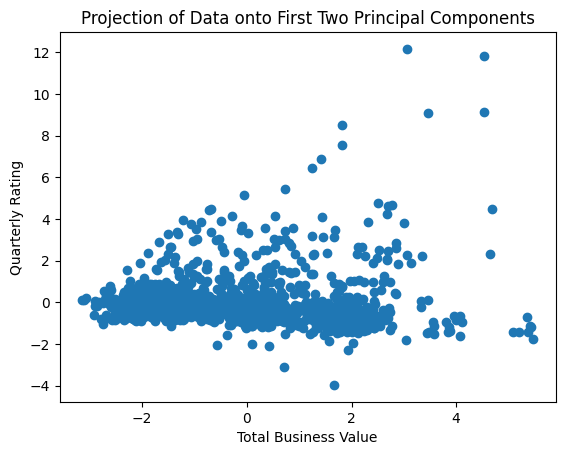

In [46]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_scaled is your scaled dataset stored as a pandas DataFrame
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)

# Retrieve the feature names from your dataset
feature_names = X_train.columns.to_list()

# Retrieve the selected feature names from PCA
selected_feature_names = [feature_names[i] for i in pca.components_.argsort()[:,-2:][::-1].flatten()]

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel(selected_feature_names[0])
plt.ylabel(selected_feature_names[1])
plt.title('Projection of Data onto First Two Principal Components')
plt.show()


In [38]:
pca.explained_variance_ratio_

array([0.06669999, 0.04318522])

In [39]:
pca.components_

array([[ 4.02358160e-18,  2.14478342e-01,  9.59860922e-03,
         5.17796276e-01,  5.33044166e-01,  5.87340976e-01,
         1.38215323e-01,  1.01874402e-01, -1.36685141e-02,
        -4.00481466e-03, -5.18239997e-02,  2.83959680e-03,
         6.77607093e-02,  2.73389475e-02,  5.16170941e-02,
        -3.41346992e-02, -6.13217429e-02, -1.95073899e-03,
        -4.50800715e-02, -1.82687065e-02, -7.98366544e-03,
         2.76442976e-02, -1.14875556e-02,  2.65301450e-02,
        -7.90875857e-03, -1.27734887e-03,  2.93093428e-03,
         1.35408253e-02,  4.58807448e-02, -1.63346185e-02,
         5.46639388e-02, -2.12470851e-02, -6.20066745e-03,
        -3.01477060e-02,  8.54279008e-03, -2.06083827e-03,
         3.30305105e-03, -1.56377333e-02],
       [ 2.02250796e-18,  6.71703209e-02, -5.46244023e-03,
        -8.63918292e-03, -1.70959890e-01, -9.52728718e-02,
         6.16260662e-01,  6.34527042e-01,  1.29722575e-01,
        -5.98088099e-03,  5.04591807e-02,  4.62403393e-03,
         3.31